In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import os

# 운영체제 별 폰트 설정
if os.name == 'posix':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

plt.rc('axes', unicode_minus = False)

In [3]:
# 폰트 주변이 흐릿하게 보이는 걸 방지한다고 하더라...
%config InlineBackend.figure_format = 'retina'

In [4]:
# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")

# CP949 포맷이 한글을 더 표현할 수 있다.
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


In [5]:
# 결측치 카운트
# 모델링을 시작하기 앞서 결측치를 줄여야 학습 데이터를 원활하게 추출할 수 있다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [6]:
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
dtype: int64

In [7]:
# groupby, pivot_table, value_counts 에 대해 학습해둘 것.

# OO 일련번호는 Unique 한 값일 것이다.
display(df.groupby(['성별코드'])['가입자일련번호'].count())

display(df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count())

display(df.groupby(['성별코드', '음주여부'])['감마지티피'].mean())

# 999 값이 나오는 경우... 이상치 같은 값이 아닐까?
display(df.groupby(['성별코드', '음주여부'])['감마지티피'].describe())

display(df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median']))


성별코드
1    531172
2    468828
Name: 가입자일련번호, dtype: int64

성별코드  음주여부
1     0.0     175150
      1.0     355826
2     0.0     327579
      1.0     140920
Name: 가입자일련번호, dtype: int64

성별코드  음주여부
1     0.0     34.710544
      1.0     56.707919
2     0.0     22.660238
      1.0     25.115149
Name: 감마지티피, dtype: float64

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   175139.0  34.710544  37.715218  1.0  18.0  25.0  38.0  999.0
     1.0   355819.0  56.707919  69.039084  1.0  24.0  37.0  63.0  999.0
2    0.0   327559.0  22.660238  25.181300  1.0  13.0  17.0  24.0  999.0
     1.0   140913.0  25.115149  35.870812  1.0  13.0  17.0  25.0  999.0

count       mean  median
성별코드 음주여부                           
1    0.0   175139  34.710544    25.0
     1.0   355819  56.707919    37.0
2    0.0   327559  22.660238    17.0
     1.0   140913  25.115149    17.0

In [10]:
# pivot table 이 groupby 보다 느리다는 속성이 있다.
display(df.pivot_table(index = '음주여부', values = '가입자일련번호', aggfunc = 'count'))

display(df.pivot_table(index = '성별코드', values = '가입자일련번호', aggfunc = 'count'))

display(df.pivot_table(index = ['성별코드', '연령대코드(5세단위)'], values = '시력(좌)', aggfunc = 'mean').unstack())

display(df.pivot_table(index = '음주여부', values = '감마지티피', aggfunc = 'describe'))

df.isnull().mean()

,가입자일련번호
음주여부,
0.0,502729
1.0,496746


,가입자일련번호
성별코드,
1,531172
2,468828


시력(좌)                                                    \
연령대코드(5세단위)        5         6         7         8         9         10   
성별코드                                                                      
1            1.105284  1.115083  1.123473  1.144882  1.130545  1.070505   
2            0.991040  1.019785  1.036010  1.061829  1.039874  0.965216   

                                                                         \
연령대코드(5세단위)        11        12        13        14        15        16   
성별코드                                                                      
1            1.024527  0.988922  0.925674  0.877288  0.839088  0.778414   
2            0.923434  0.884803  0.815438  0.759283  0.729111  0.687832   

                                 
연령대코드(5세단위)        17        18  
성별코드                             
1            0.789840  0.815443  
2            0.655609  0.742804

,25%,50%,75%,count,max,mean,min,std
음주여부,,,,,,,,
0.0,14.0,19.0,29.0,502698.0,999.0,26.858541,1.0,30.687404
1.0,19.0,30.0,53.0,496732.0,999.0,47.745678,1.0,63.103844


기준년도            0.000000
가입자일련번호         0.000000
성별코드            0.000000
연령대코드(5세단위)     0.000000
시도코드            0.000000
신장(5Cm단위)       0.000262
체중(5Kg 단위)      0.000268
허리둘레            0.000440
시력(좌)           0.000288
시력(우)           0.000279
청력(좌)           0.000242
청력(우)           0.000243
수축기혈압           0.000076
이완기혈압           0.000077
식전혈당(공복혈당)      0.000043
총콜레스테롤          0.000043
트리글리세라이드        0.000043
HDL콜레스테롤        0.000044
LDL콜레스테롤        0.002899
혈색소             0.000056
요단백             0.004859
혈청크레아티닌         0.000044
(혈청지오티)AST      0.000042
(혈청지오티)ALT      0.000044
감마지티피           0.000045
흡연상태            0.000160
음주여부            0.000525
구강검진 수검여부       0.000000
치아우식증유무         1.000000
결손치유무           1.000000
치아마모증유무         1.000000
제3대구치(사랑니)이상    1.000000
치석              0.601252
데이터공개일자         0.000000
dtype: float64

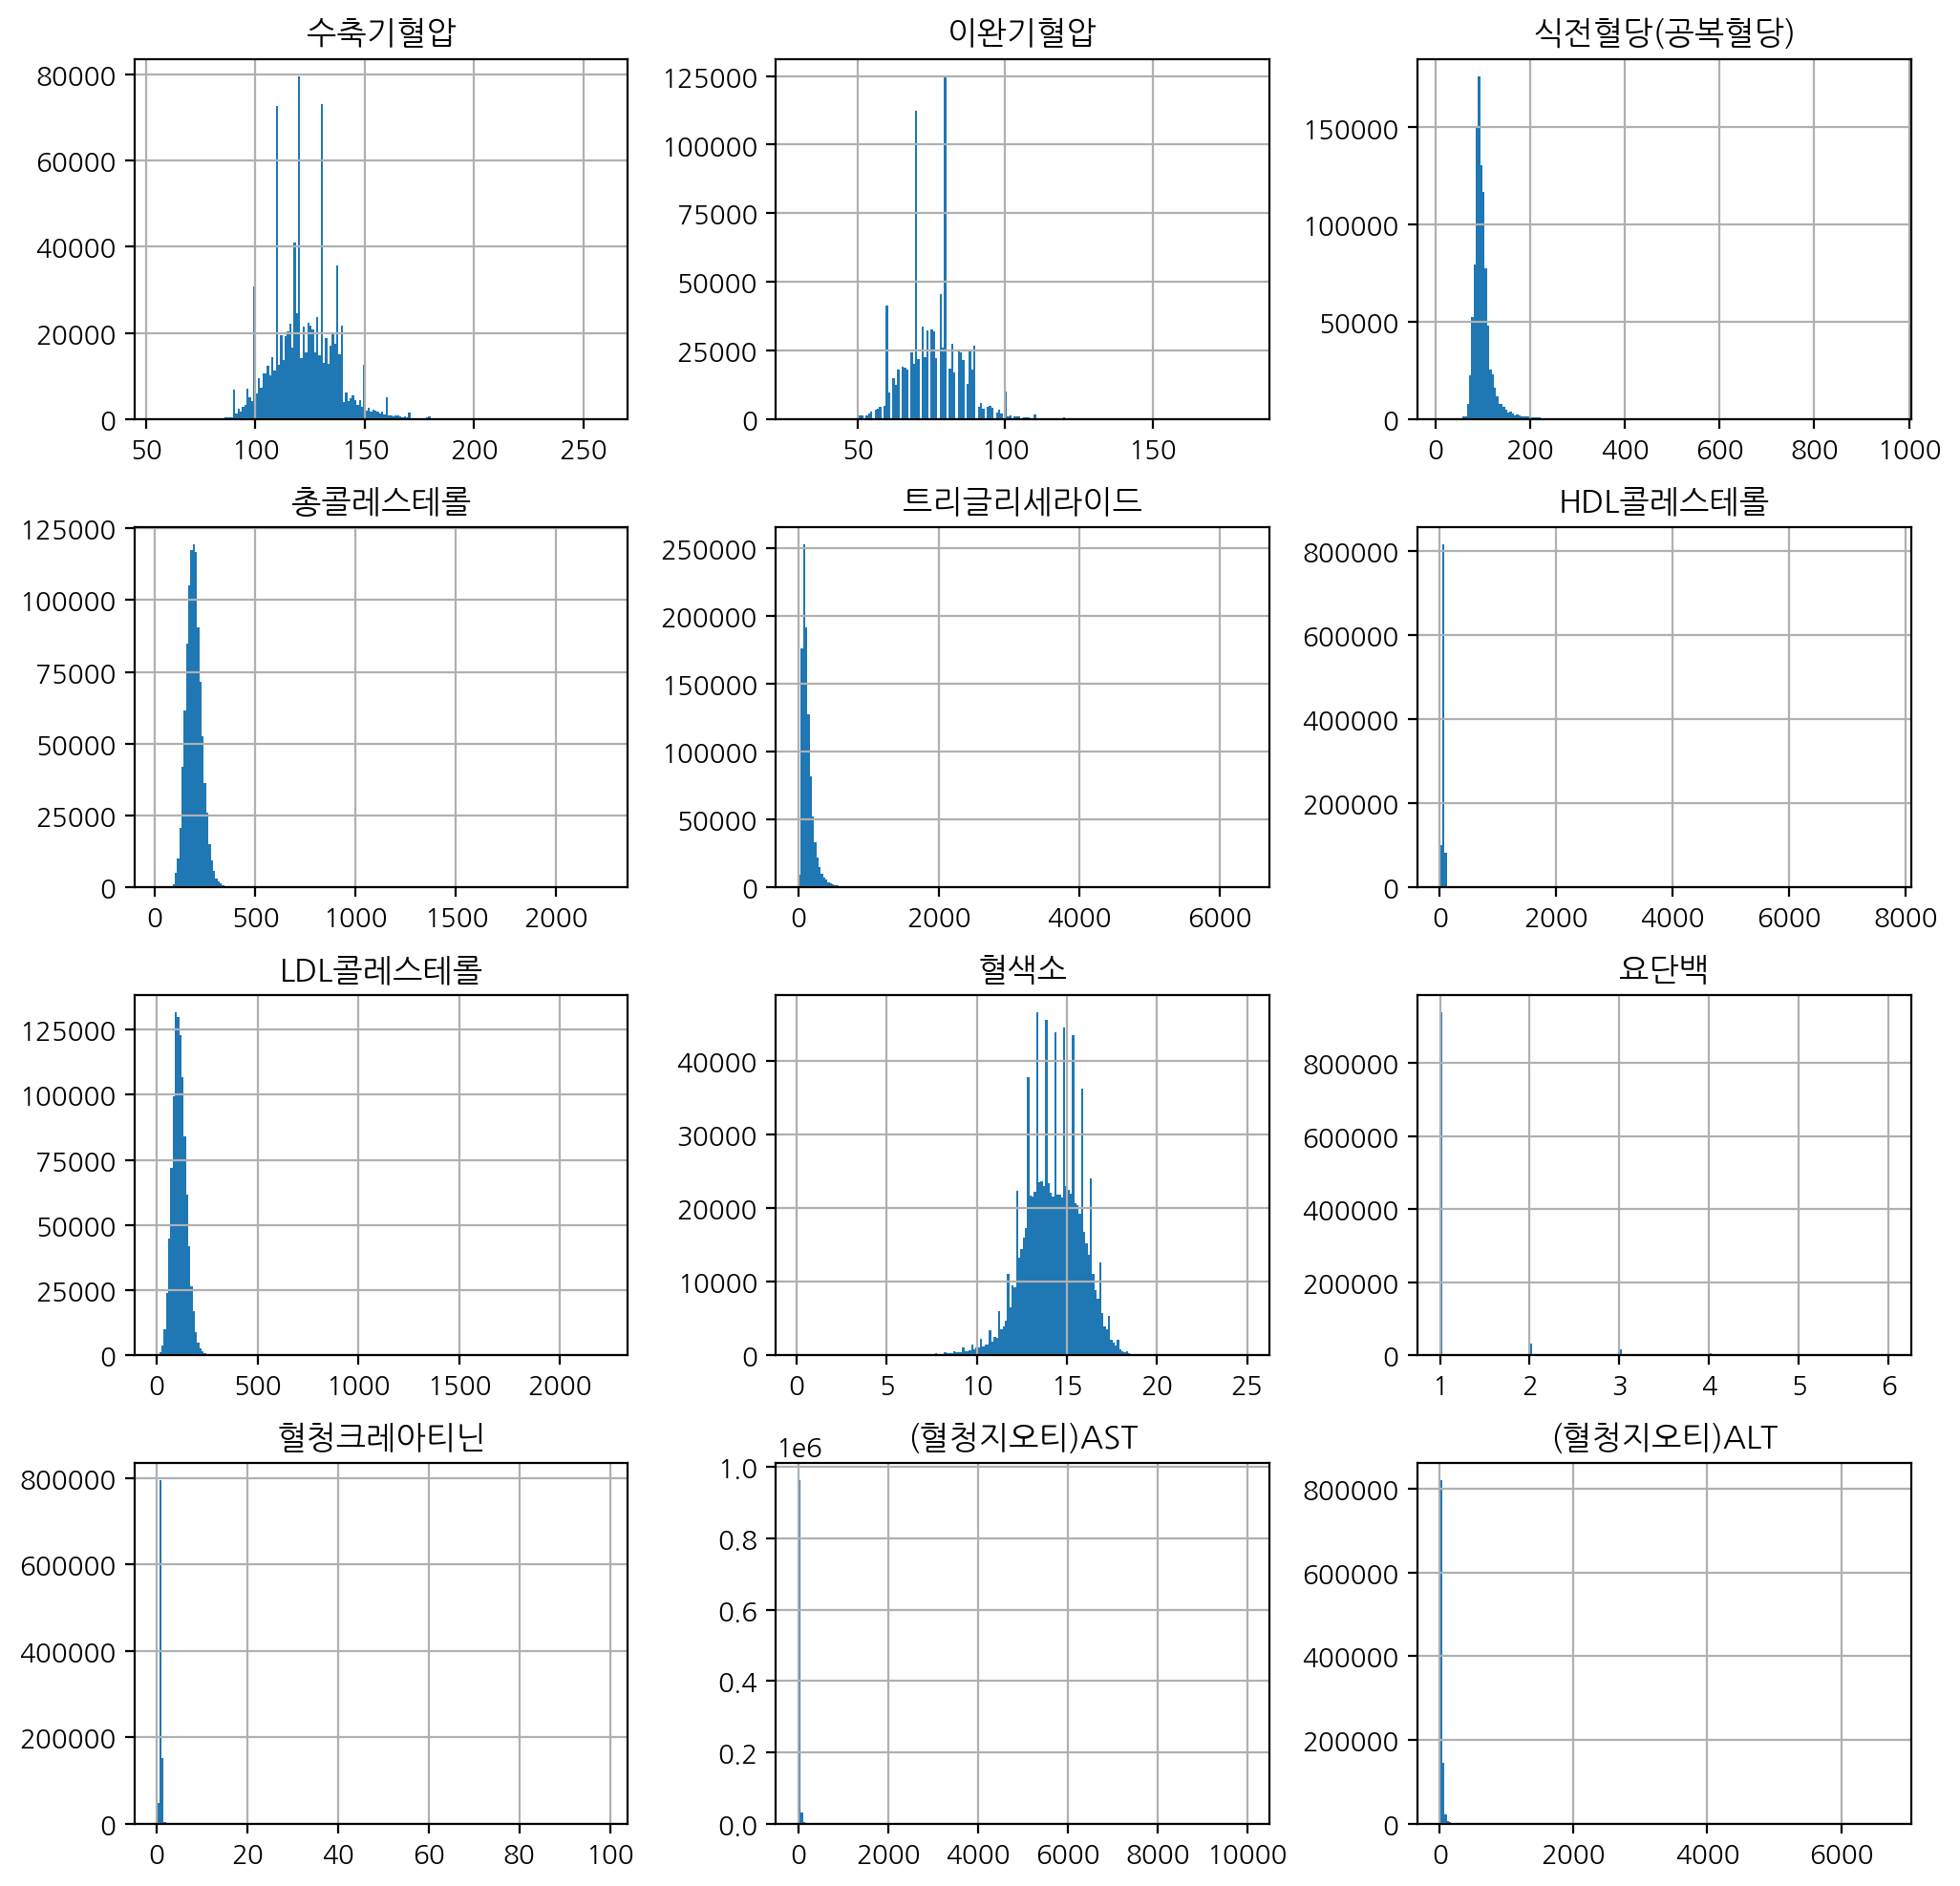

In [14]:
# 데이터가 많으면 비용이 많아지기 때문에 groupby 를 처리해주는 편이 좋다.
#h = df.hist(figsize = (12, 12))

#h1 = df.iloc[:, :12].hist(figsize = (12, 12))

# bins 값이 커질수록 상세하게 그려진다.
h2 = df.iloc[:, 12:24].hist(figsize = (12, 12), bins = 200)

# 수치형 vs 범주형에 따른 데이터 그림은? 다르게 나올 것으로 추측된다.

<AxesSubplot:xlabel='성별코드', ylabel='count'>

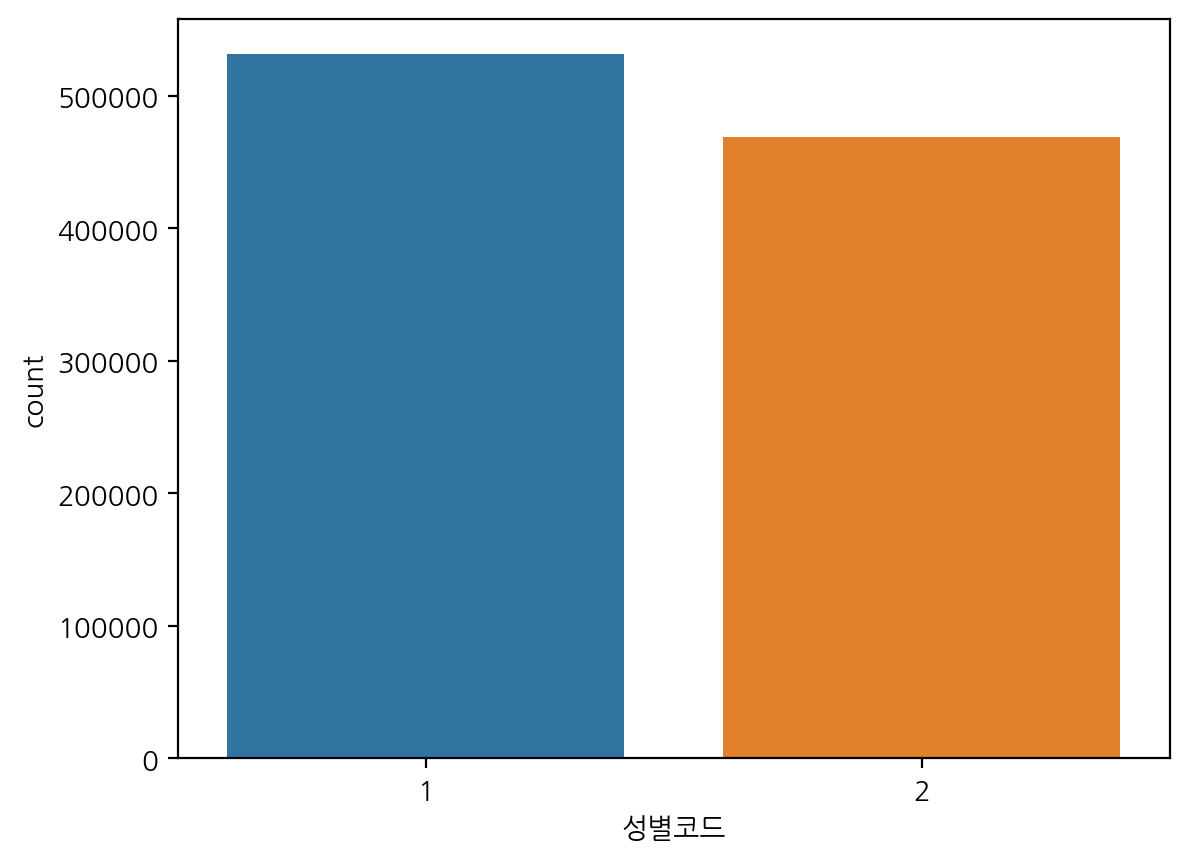

In [24]:
# 표본추출 (임의적)
sample = df.sample(1000, random_state = 1) # random_state 가 seed 같은 거라 생각하면 되겠다.

# 데이터 : 범주형, 수치형
#df['음주여부'].value_counts().plot.bar()

sns.countplot(x = '성별코드', data = df)

<AxesSubplot:xlabel='음주여부', ylabel='count'>

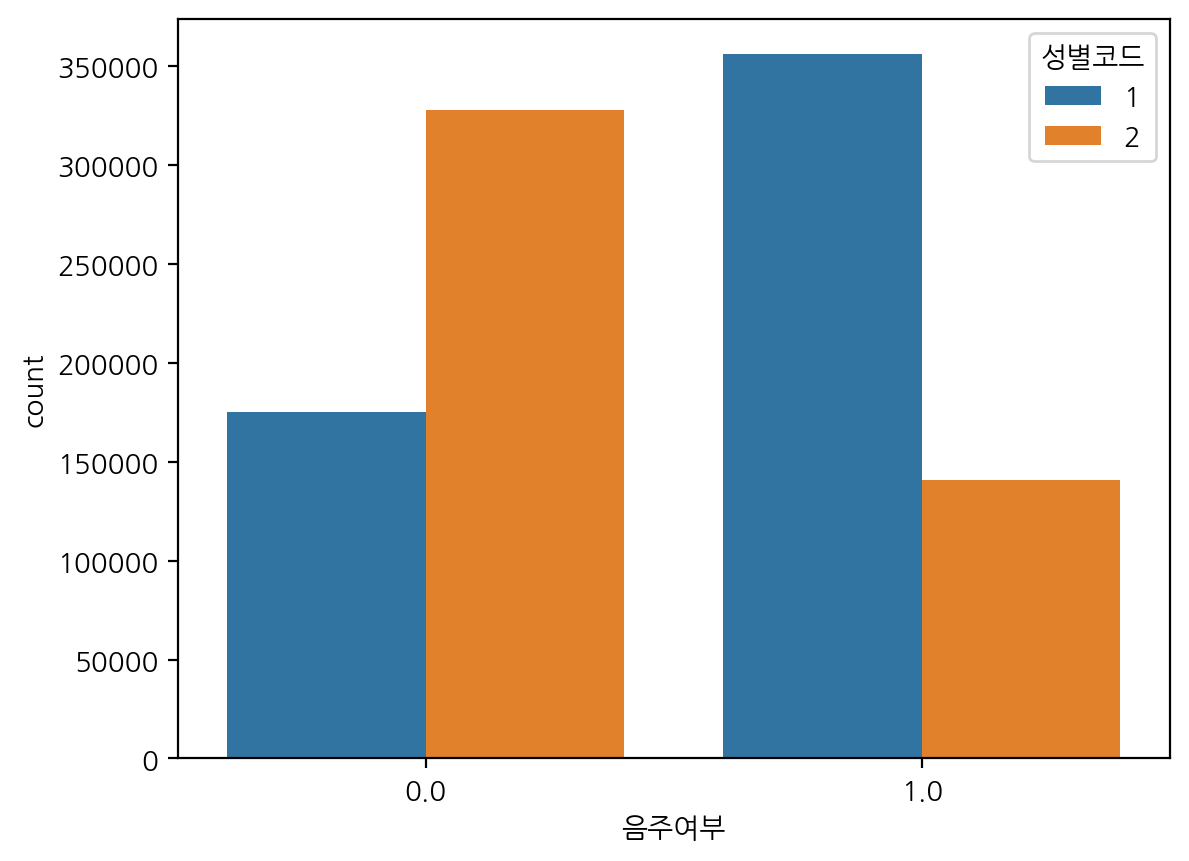

In [26]:
# sns.set() 메소드를 사용해서 폰트 등을 설정해줄 수 있다.

sns.countplot(data = df, x = '음주여부', hue = '성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='count'>

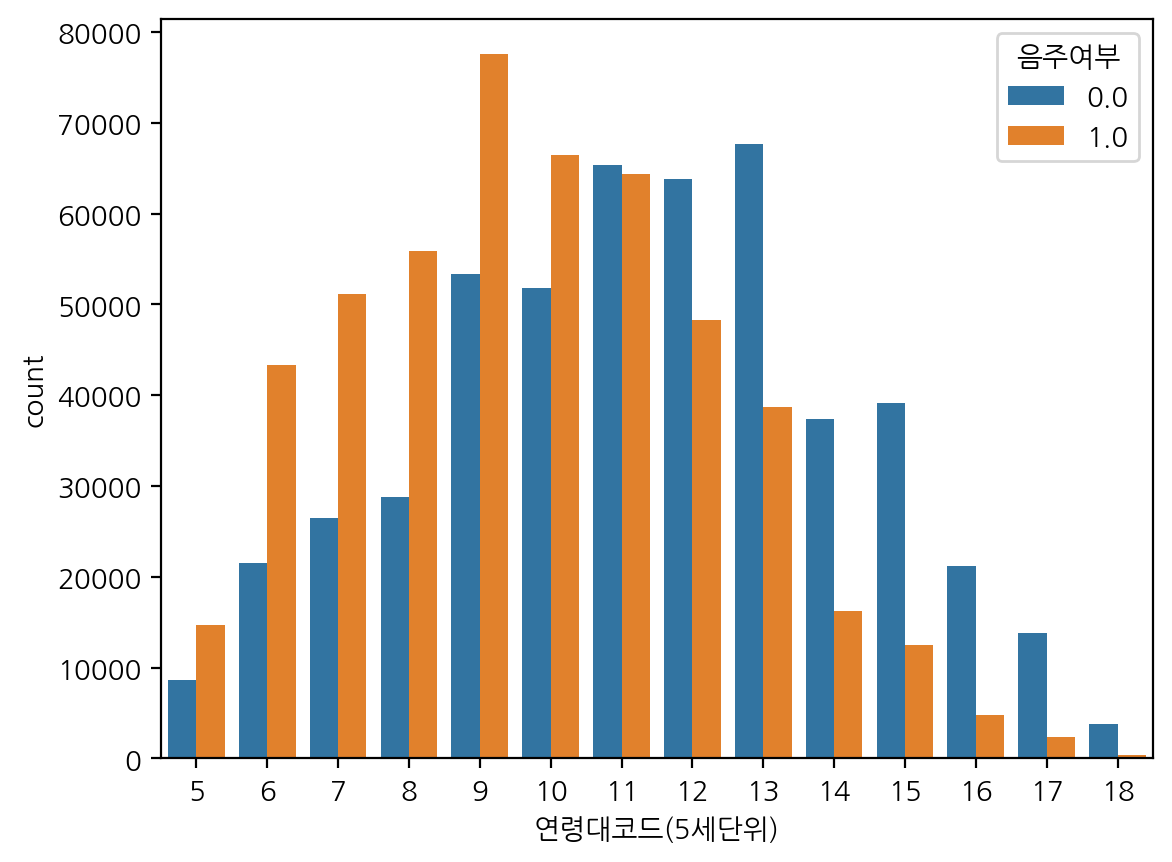

In [27]:
sns.countplot(data = df, x = '연령대코드(5세단위)', hue = '음주여부')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='count'>

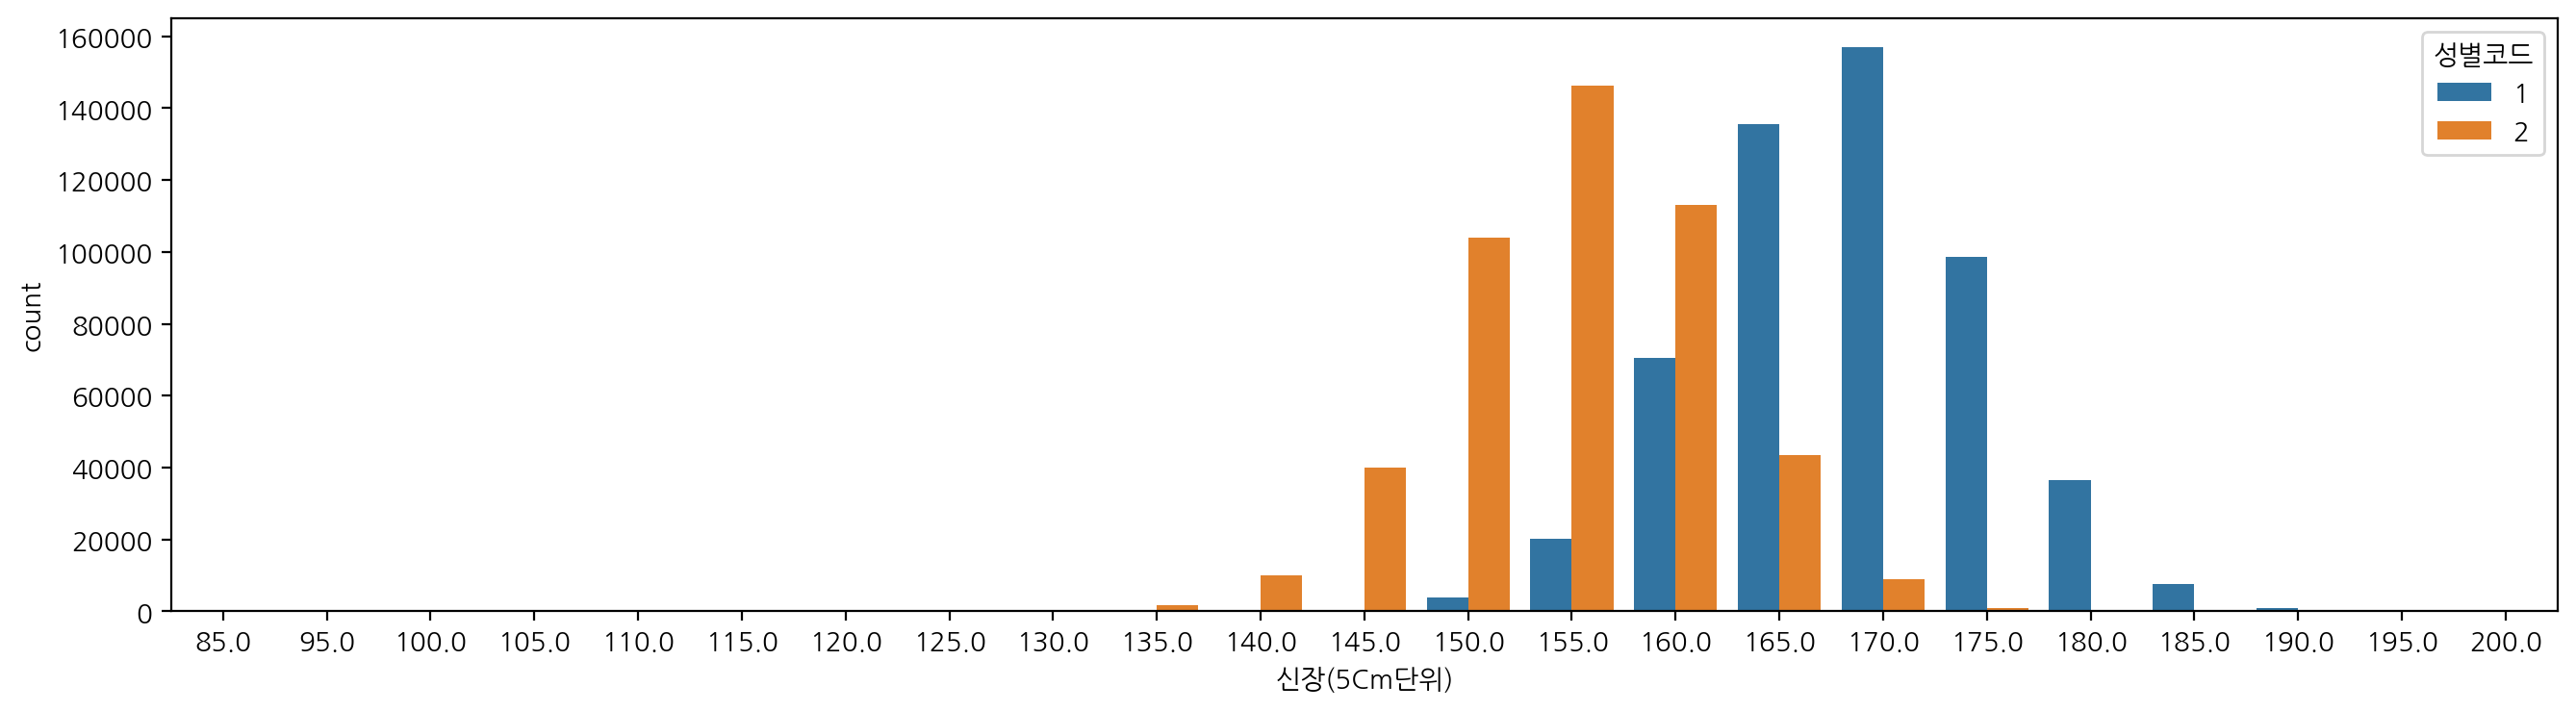

In [29]:
# 범주형 데이터 : 몸무게, 키 등을 단위로 나뉘어 카운트 한 것도 결국은 범주형 밖에 속하지 않는다.
plt.figure(figsize = (16, 4))
sns.countplot(data = df, x = '신장(5Cm단위)', hue = '성별코드')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

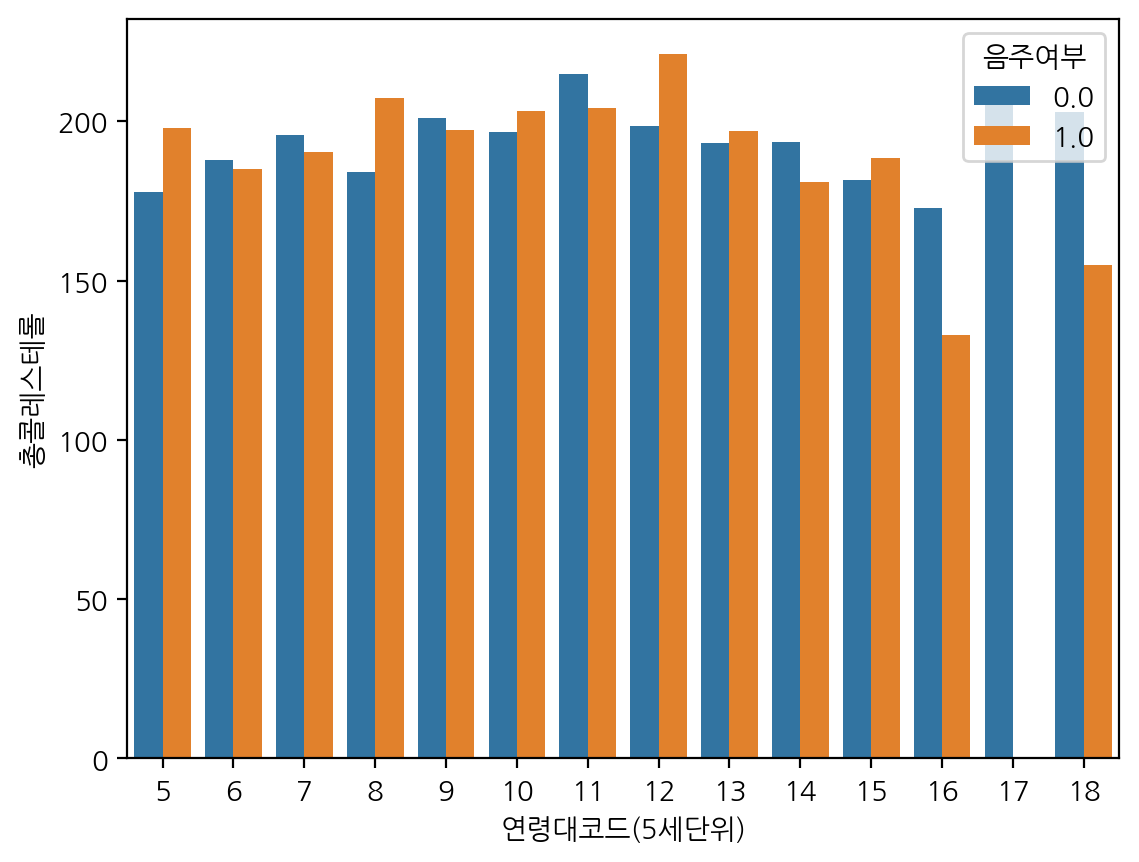

In [48]:
# barplot (수염상자 그래프?)
# 코드가 느릴 것이다. 데이터가 많을수록 estimator 로 인한 연산이 지체될 수 있다. (수치형 기준)
sns.barplot(data = df.sample(1000), x = '연령대코드(5세단위)', y = '총콜레스테롤', hue = '음주여부', errorbar = None)

# 검은색 막대가 곧 신뢰구간. (95퍼센트 기준.)

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

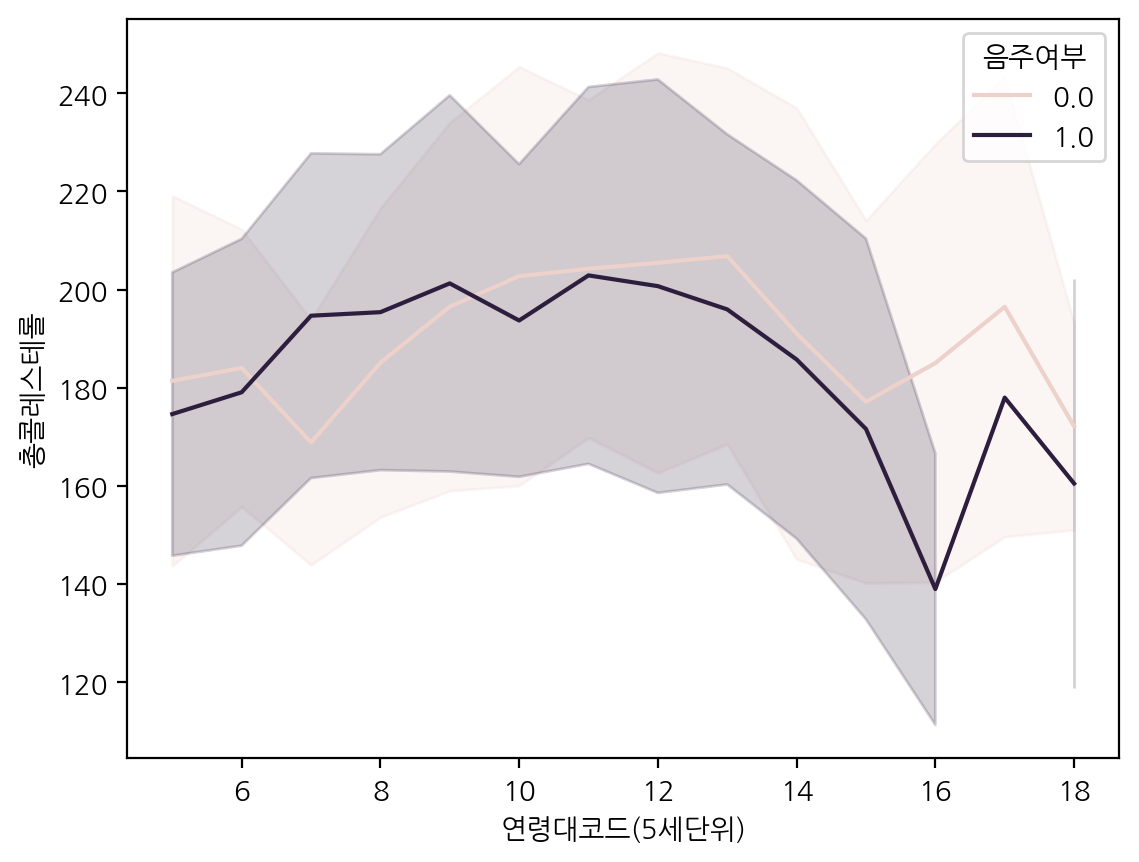

In [51]:
# lineplot
# errorbar 가 그림자인데, 이 값이 표본평균 데이터에 대한 신뢰 구간을 그린다.
sns.lineplot(data = df.sample(1000), x = '연령대코드(5세단위)', y = '총콜레스테롤', hue = '음주여부', errorbar = 'sd')

<AxesSubplot:xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

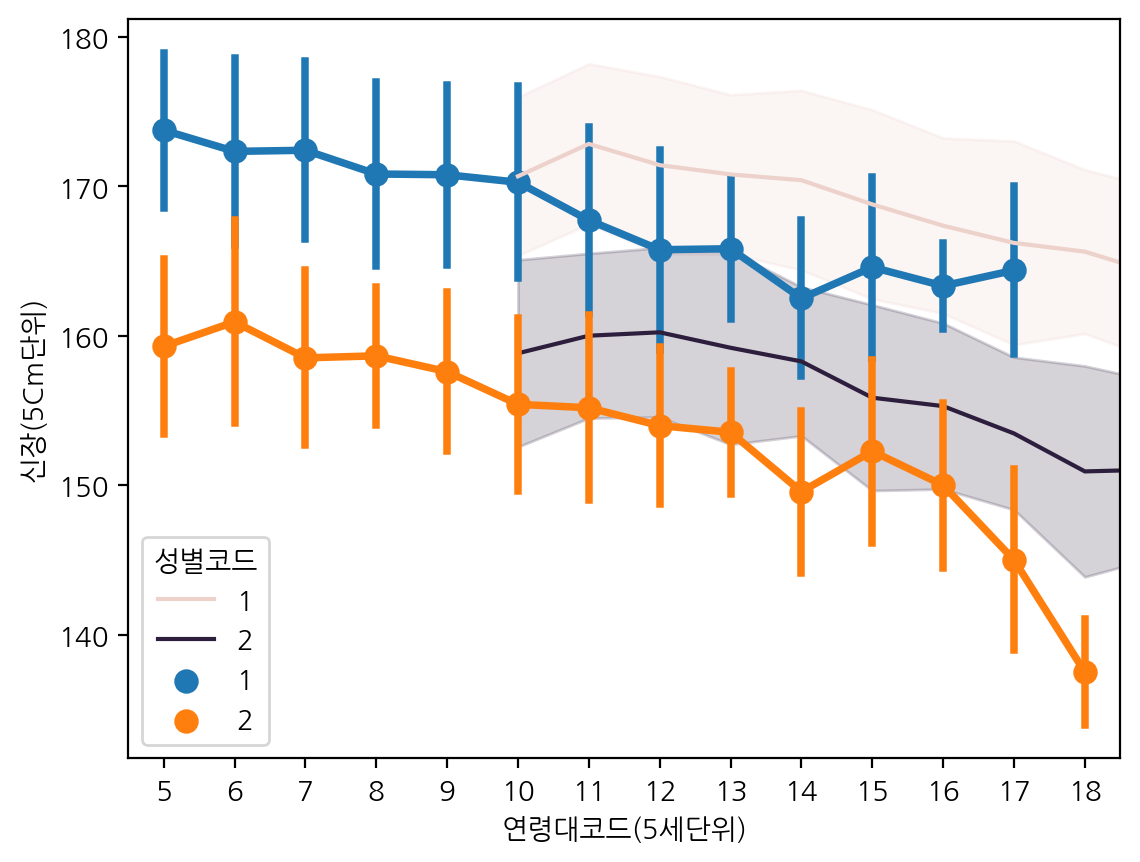

In [53]:
# lineplot 는 시간에 대한 데이터를 그릴 때 효율적일 것이다.
sns.lineplot(data = df.sample(1000), x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', errorbar = 'sd')

# pointplot 는 주식 같이 생겼지만 (?) 평균, 신뢰구간을 그리는 것 뿐이다.
sns.pointplot(data = df.sample(1000), x = '연령대코드(5세단위)', y = '신장(5Cm단위)', hue = '성별코드', errorbar = 'sd')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

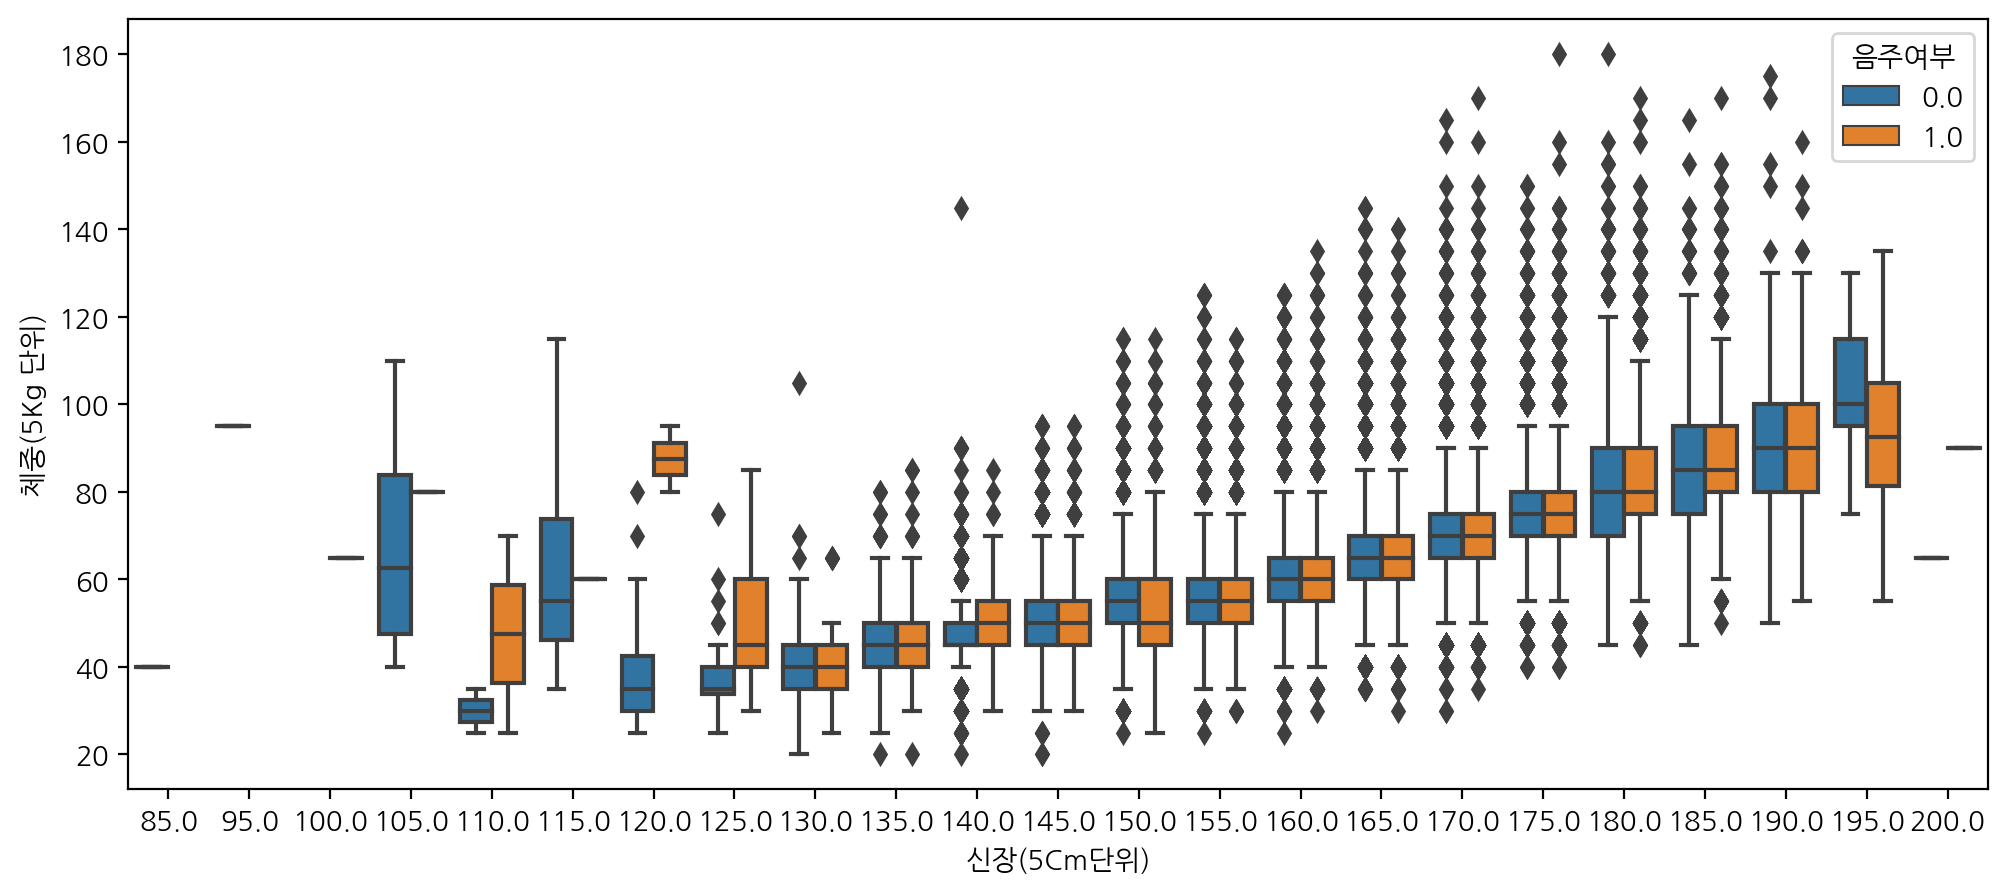

In [58]:
# boxplot -> barplot 이랑 다르다. 주의할 것. (주식 데이터를 이거로 사용하고 있다.)
# boxplot 데이터 : 최소값, 최댓값, 1사분위 ~ 3사분위, 이상치 등.
# 이상치의 기준 : Q3 - Q1 = IQR, X < Q1 - 1.5 * IQR || X > Q3 + 1.5 * IQR
plt.figure(figsize = (12, 5))
sns.boxplot(data = df, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '음주여부')

<AxesSubplot:xlabel='신장(5Cm단위)', ylabel='체중(5Kg 단위)'>

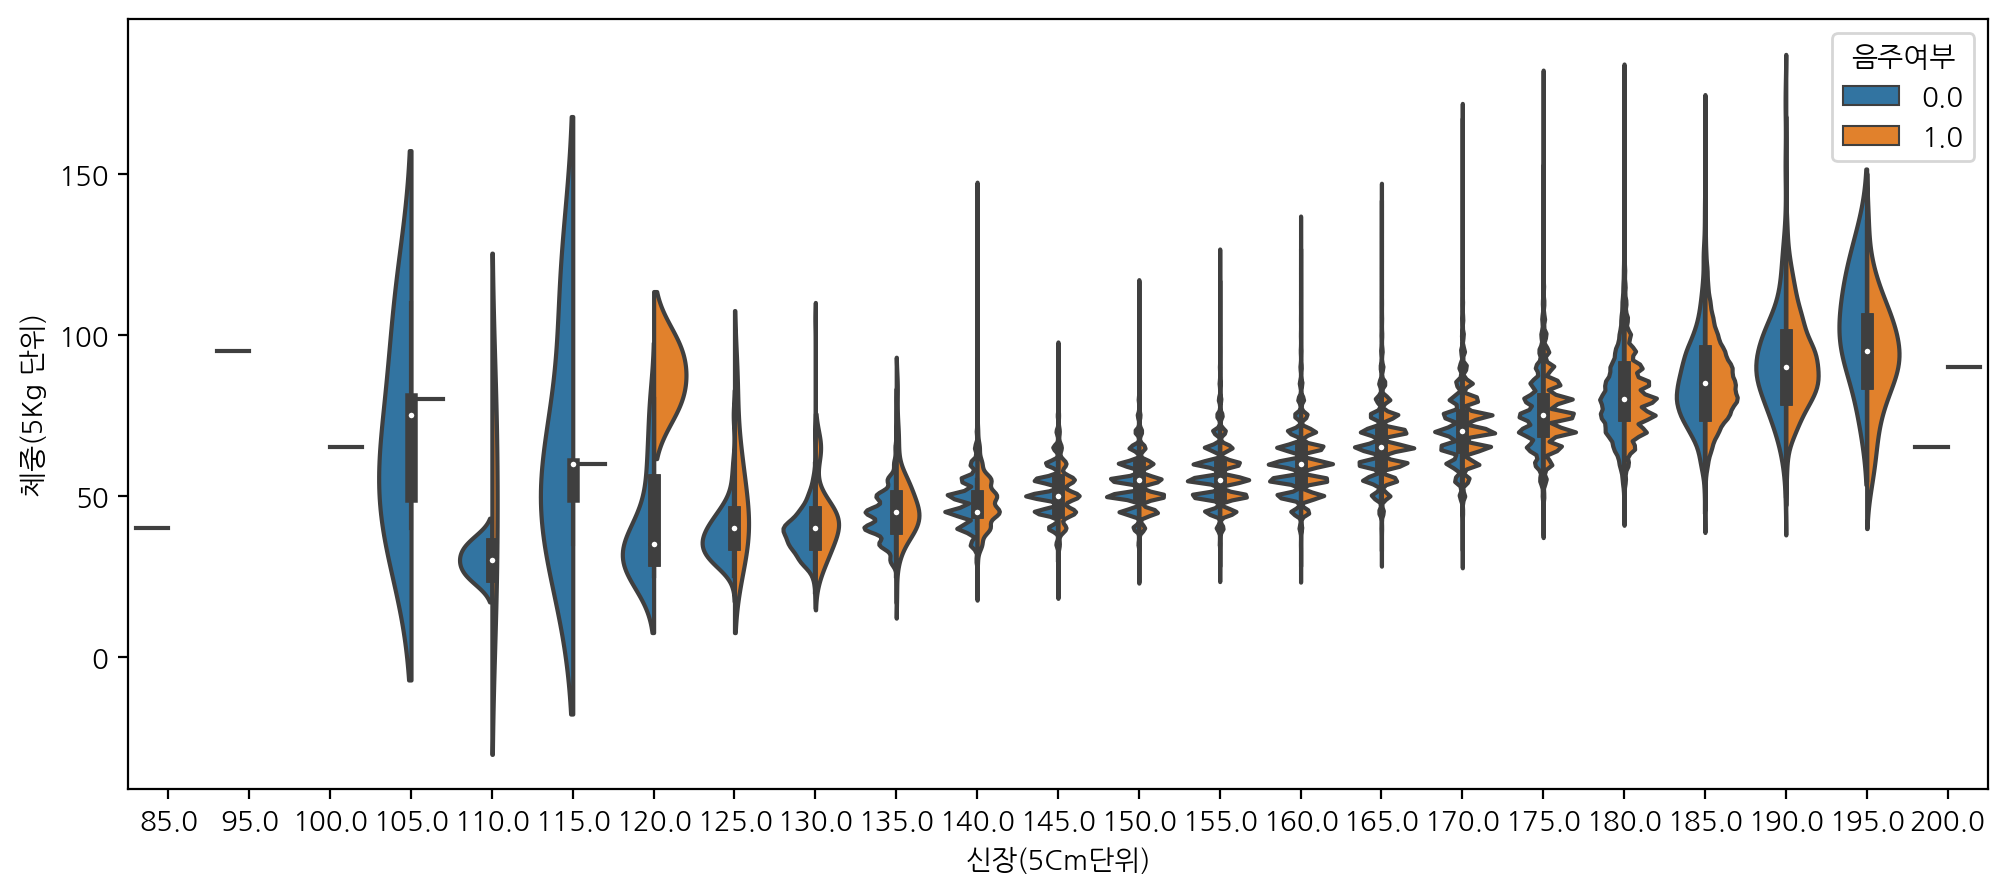

In [60]:
# 바이올린플롯 (violinplot) 도 있다. 아래 모양에 비해 데이터 빈도가 나온다. 단, 이상치 여부는 파악해주지 않는다.
plt.figure(figsize = (12, 5))
sns.violinplot(data = df, x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '음주여부', split = True)

/Users/kangdb/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 14.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kangdb/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kangdb/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/kangdb/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/categorical.py:3540: UserWarning: 57.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserW

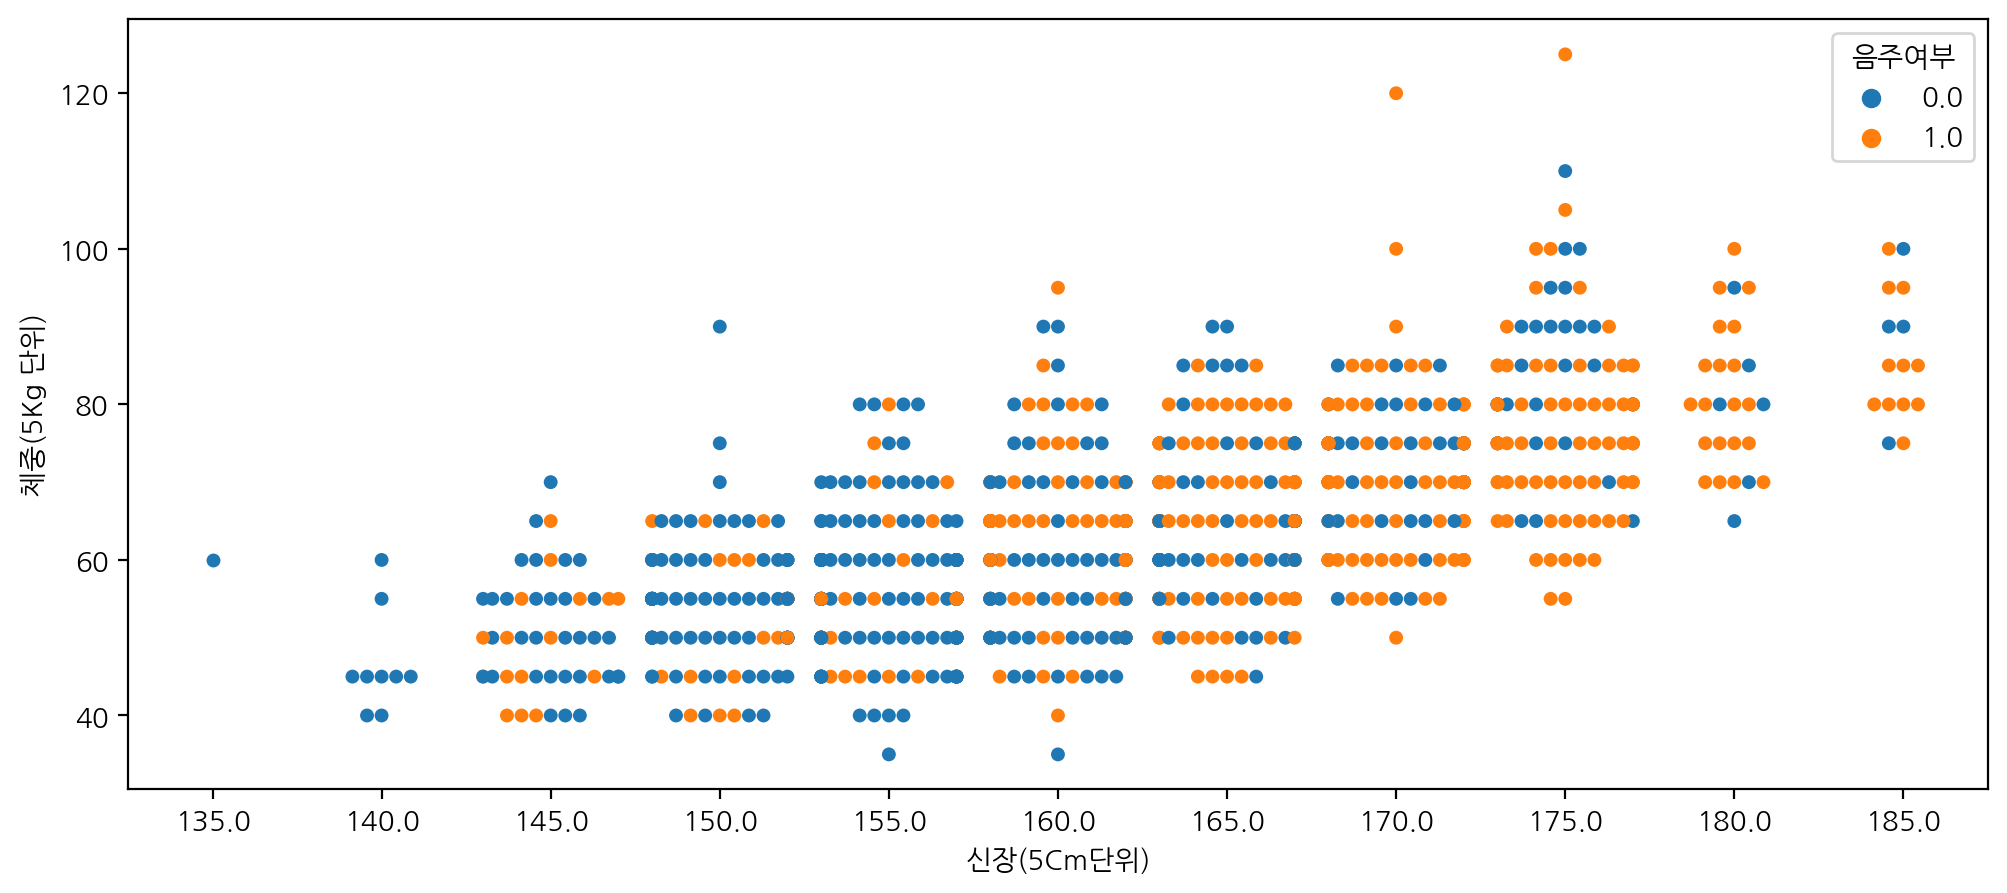

In [64]:
# swarmplot 도 있다. 바이올린 모양 대신 점자로 나타낸다. (좀 걸린다... ㅜㅜ)
plt.figure(figsize = (12, 5))
graph = sns.swarmplot(data = df.sample(1000), x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '음주여부')

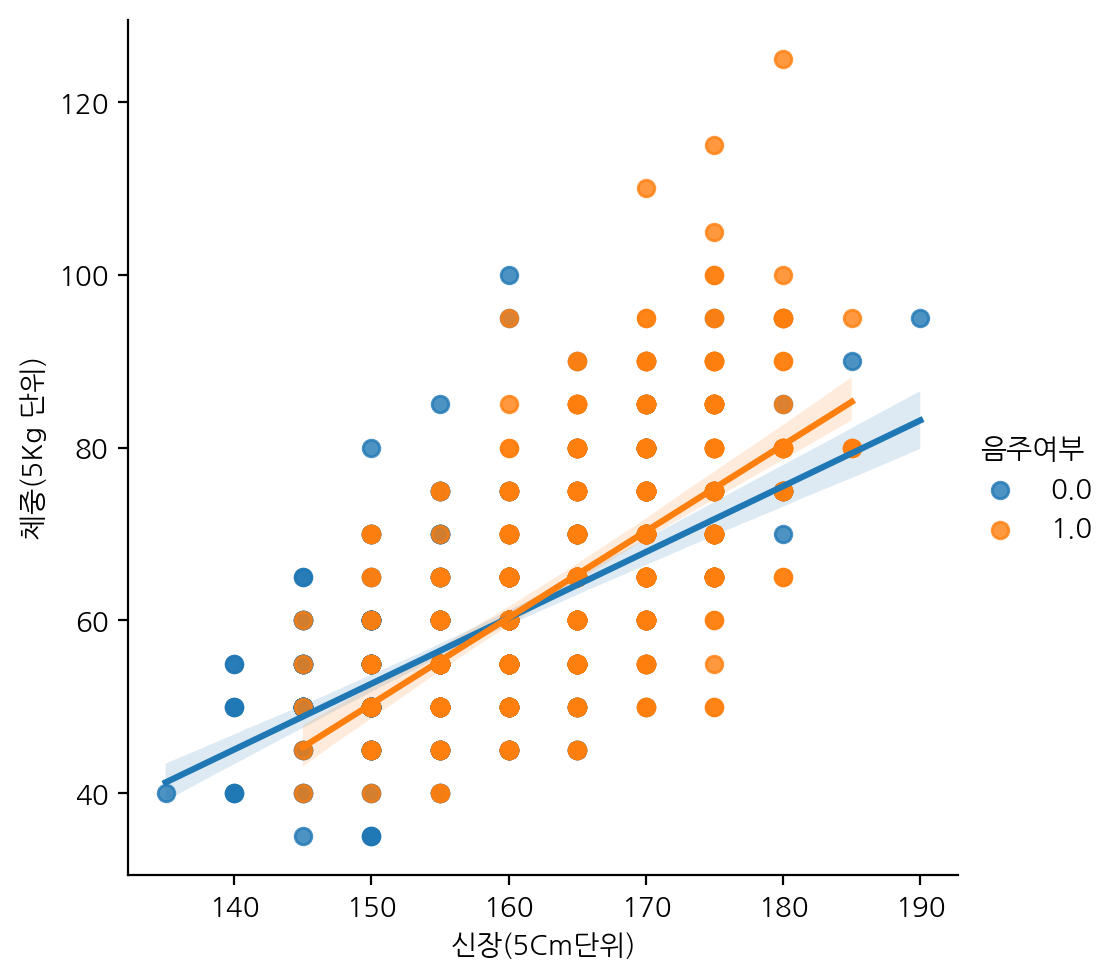

In [68]:
# lmplot 도 있다. 회귀선을 통한 상관관계를 파악할 수 있다.
# robust 를 사용하기 위해 statsmodels 라이브러리가 필요하다. 이상치를 제거해주지만, 데이터가 많을수록 오래 걸린다.
sns.lmplot(data = df.sample(1000), x = '신장(5Cm단위)', y = '체중(5Kg 단위)', hue = '음주여부', robust = True)

In [ ]:
# 두 변수 간 상관 분석 (두 변수 강도에 따라 달라진다.) 연관만 나타내지, 인과 관계를 연동한다는 보장은 안 된다.